In [ ]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping



In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


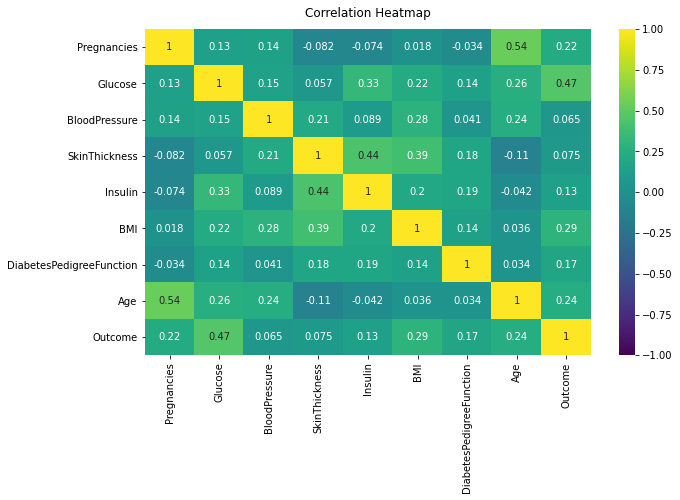

In [ ]:
plt.figure(figsize=(10,6))

heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=True, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()


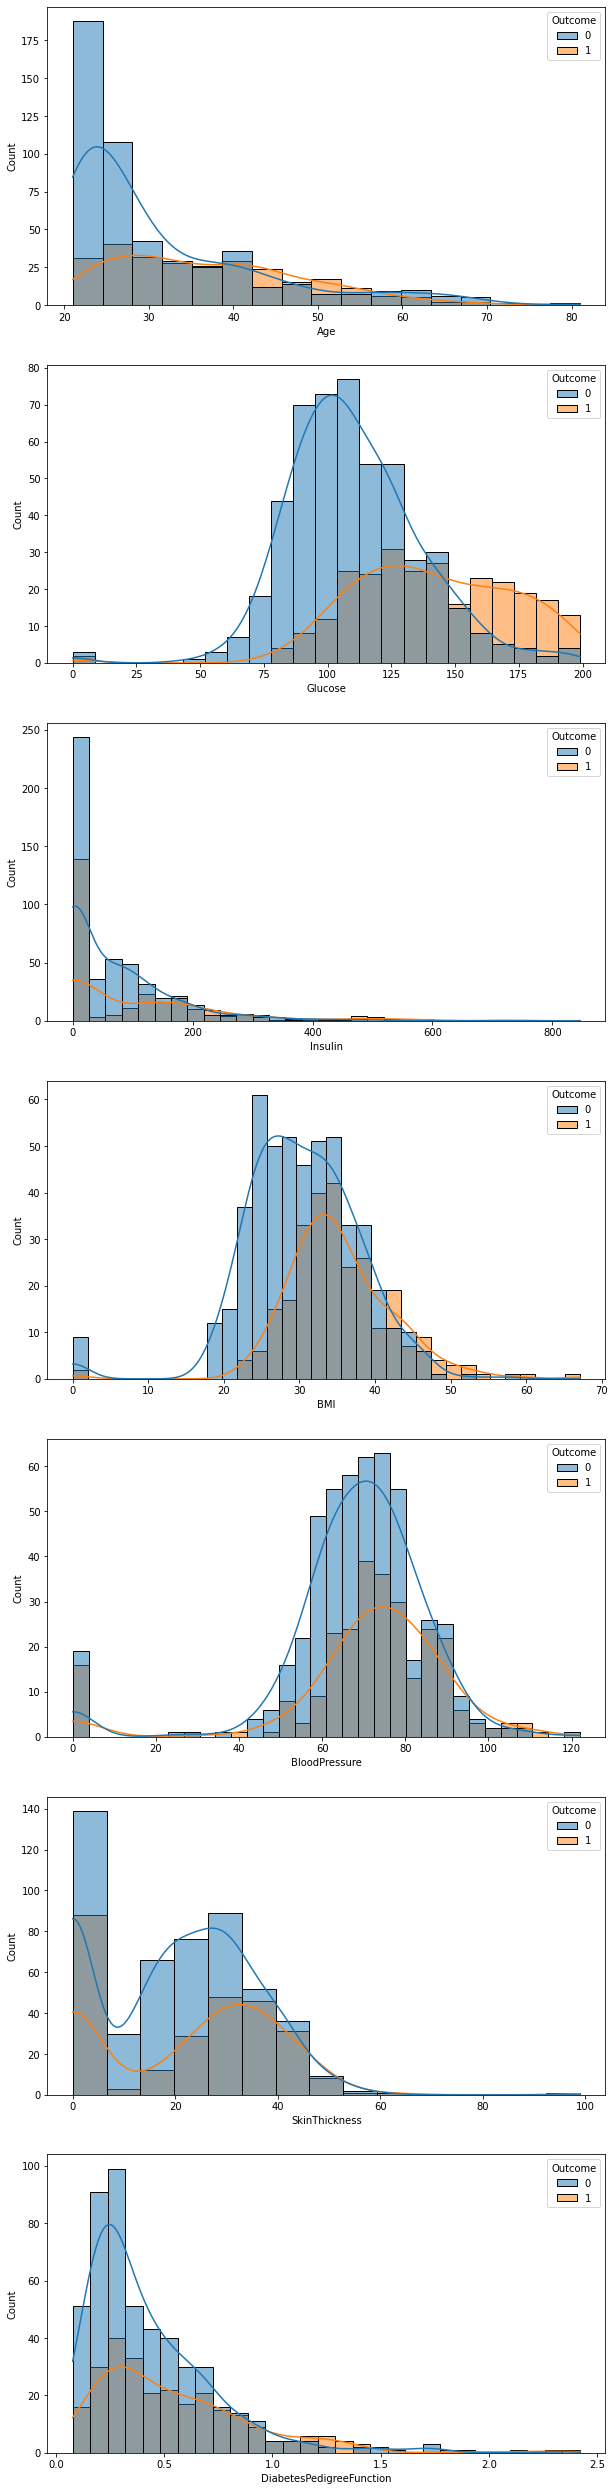

In [ ]:
fig, ax=plt.subplots(7,1,figsize=(10,45))

sns.histplot(ax=ax[0],data=df, x='Age',hue='Outcome',kde=True)
sns.histplot(ax=ax[1],data=df, x='Glucose',hue='Outcome',kde=True)
sns.histplot(ax=ax[2],data=df, x='Insulin',hue='Outcome',kde=True)
sns.histplot(ax=ax[3],data=df, x='BMI',hue='Outcome',kde=True)
sns.histplot(ax=ax[4],data=df, x='BloodPressure',hue='Outcome',kde=True)
sns.histplot(ax=ax[5],data=df, x='SkinThickness',hue='Outcome',kde=True)
sns.histplot(ax=ax[6],data=df, x='DiabetesPedigreeFunction',hue='Outcome',kde=True)

plt.show()

In [ ]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(df.drop(columns='Outcome'), df['Outcome'],
                                          test_size=0.15, shuffle=True,random_state=42,stratify=df['Outcome'])

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
X_tr[['Age','Insulin','DiabetesPedigreeFunction']] = scaler1.fit_transform(X_tr[['Age','Insulin','DiabetesPedigreeFunction']])
X_ts[['Age','Insulin','DiabetesPedigreeFunction']] = scaler1.transform(X_ts[['Age','Insulin','DiabetesPedigreeFunction']])

X_tr[['Glucose','BMI','BloodPressure','SkinThickness']] = scaler2.fit_transform(X_tr[['Glucose','BMI','BloodPressure','SkinThickness']])
X_ts[['Glucose','BMI','BloodPressure','SkinThickness']] = scaler2.transform(X_ts[['Glucose','BMI','BloodPressure','SkinThickness']])


In [ ]:
model = models.Sequential()

model.add(layers.Dense(20, activation = 'relu', input_shape=(X_tr.shape[1],)))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss',mode='min', patience=10, verbose=1)

history= model.fit(X_tr,Y_tr,
                 epochs=75,
                 batch_size=15,
                 validation_data=(X_ts,Y_ts),
                 callbacks=[es])

Epoch 1/75
44/44 [==============================] - 0s 5ms/step - loss: 0.7050 - accuracy: 0.6375 - val_loss: 0.6793 - val_accuracy: 0.5259
Epoch 2/75
44/44 [==============================] - 0s 3ms/step - loss: 0.6569 - accuracy: 0.6377 - val_loss: 0.6519 - val_accuracy: 0.6379
Epoch 3/75
44/44 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.6349 - val_loss: 0.6273 - val_accuracy: 0.6466
Epoch 4/75
44/44 [==============================] - 0s 3ms/step - loss: 0.6197 - accuracy: 0.6560 - val_loss: 0.6074 - val_accuracy: 0.6638
Epoch 5/75
44/44 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.6887 - val_loss: 0.5882 - val_accuracy: 0.7069
Epoch 6/75
44/44 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.7266 - val_loss: 0.5739 - val_accuracy: 0.7241
Epoch 7/75
44/44 [==============================] - 0s 3ms/step - loss: 0.5644 - accuracy: 0.7440 - val_loss: 0.5633 - val_accuracy: 0.7155
Epoch 8/75
44/44 [==

In [ ]:
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')


plt.show()

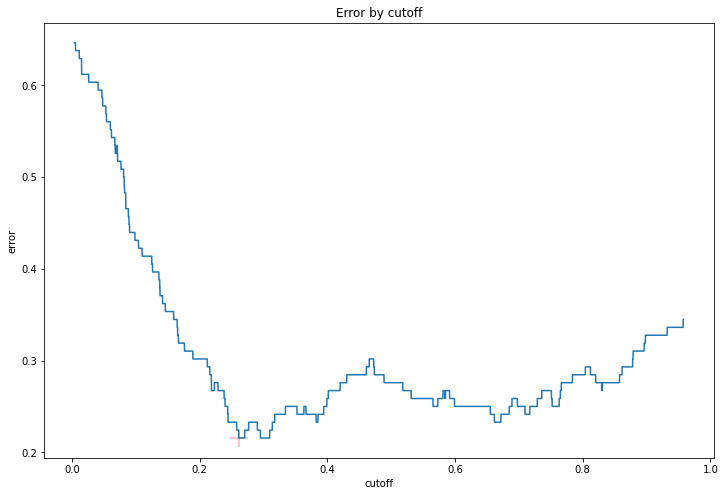

Y_pred > 0.2612, means positive


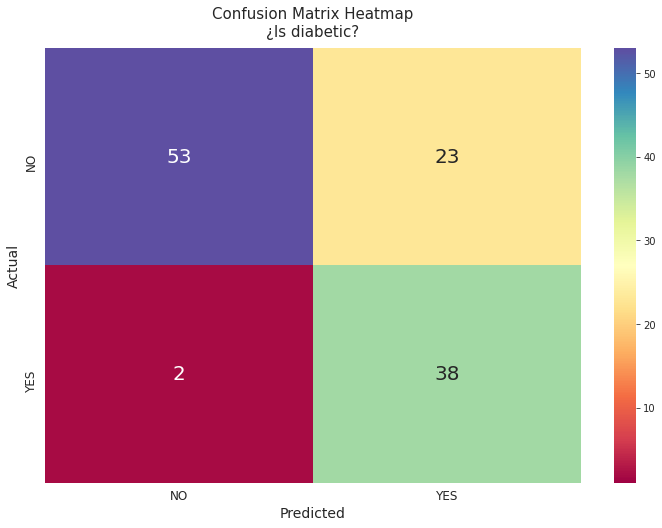

-Acuracy achieved: 78.45%
-Accuracy by model was: 77.76%
-Accuracy by validation was: 72.41%


In [ ]:
Y_pred = model.predict(X_ts)

error = []
grid = np.linspace(min(Y_pred)[0],max(Y_pred)[0],10000)


for i in grid:
    y_pred_i = (Y_pred>i).astype('int32')
    fails = confusion_matrix(Y_ts,y_pred_i)[0,1]+confusion_matrix(Y_ts,y_pred_i)[1,0]
    error_i = fails/len(Y_ts)
    error.append(error_i)

i_error = list(zip(grid,error))
i_min = i_error[np.argmin(error)][0]


plt.figure(figsize=(12,8))
griderror = sns.lineplot(x=grid, y=error)
griderror.set_title('Error by cutoff')
griderror.set_xlabel('cutoff')
griderror.set_ylabel('error')
plt.scatter(x=i_min,y=min(error), s=300, color='r', marker='+', alpha=0.3)
plt.show()
    

Y_pred=(Y_pred>i_min).astype('int32')
print('Y_pred > {:.4f}, means positive'.format(i_min))

conf_mat = confusion_matrix(Y_ts,Y_pred)
sns.set_style(style='dark')
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":20},cmap='Spectral')
heatmap.set_title('Confusion Matrix Heatmap\n¿Is diabetic?', fontdict={'fontsize':15}, pad=12)
heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
heatmap.set_xticklabels(['NO','YES'], fontdict={'fontsize':12})
heatmap.set_yticklabels(['NO','YES'], fontdict={'fontsize':12})
plt.show()


print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format((1-min(error))*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))